<a href="https://colab.research.google.com/github/Dmitriy6655/Sem_03_logistic_regerssion/blob/main/Sem_03_lin_regerssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Урок 3. Классификация на практике
Ссылка на набор данных.

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.

Создайте модель линейной регрессии, которая бы оценивала лояльность пользователей к отклику.

Пояснения к признакам набора данных:

* **AGREEMENT_RK** — уникальный идентификатор объекта в выборке;
* **TARGET** — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
* **AGE** — возраст клиента;
* **SOCSTATUS_WORK_FL** — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
* **SOCSTATUS_PENS_FL** — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
* **GENDER** — пол клиента (1 — мужчина, 0 — женщина);
* **CHILD_TOTAL** — количество детей клиента;
* **DEPENDANTS** — количество иждивенцев клиента;
* **PERSONAL_INCOME** — личный доход клиента (в рублях);
* **LOAN_NUM_TOTAL** — количество ссуд клиента;
* **LOAN_NUM_CLOSED** — количество погашенных ссуд клиента.

In [1]:
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
# из модуля model_selection библиотеки sklearn импортируем функцию train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
data=pandas.read_csv('ClientsData.csv')

df=pd.DataFrame(data)
df.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
0,49,1,0,1,2,1,5000.0,1,1,2,0
1,32,1,0,1,3,3,12000.0,1,1,1,0
2,52,1,0,1,4,0,9000.0,2,1,0,0
3,39,1,0,1,1,1,25000.0,1,1,3,0
4,30,1,0,0,0,0,12000.0,2,1,2,0


In [3]:
df.info()#метод обнаружения пропусков в данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                15223 non-null  int64  
 1   SOCSTATUS_WORK_FL  15223 non-null  int64  
 2   SOCSTATUS_PENS_FL  15223 non-null  int64  
 3   GENDER             15223 non-null  int64  
 4   CHILD_TOTAL        15223 non-null  int64  
 5   DEPENDANTS         15223 non-null  int64  
 6   PERSONAL_INCOME    15223 non-null  float64
 7   LOAN_NUM_TOTAL     15223 non-null  int64  
 8   LOAN_NUM_CLOSED    15223 non-null  int64  
 9   LOAN_DLQ_NUM       15223 non-null  int64  
 10  TARGET             15223 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.3 MB


Наша цель — прогноз переменной Y, т.е. согласится ли клиент на новую услугу банка.(0 — нет, 1 — да)

In [5]:
x = DataFrame(data, columns=['LOAN_NUM_TOTAL' ])
y = DataFrame(data, columns=['TARGET' ])


# Инициализация классификатора логистической регрессии
clf = LogisticRegression()
# Обучение классификатора на данных
clf.fit(x, y)
# Прогнозирование меток классов для данных
y_pred = clf.predict(x)
print(y_pred)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###Исследование данных

In [6]:
fg=data['TARGET'].value_counts()
print(fg)

TARGET
0    13411
1     1812
Name: count, dtype: int64


Метод **groupby()** позволяет группировать данные по одному или нескольким столбцам и вычислять различные статистики для каждой группы.

<ipython-input-7-e84a6b5b150a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=data, palette='hls')


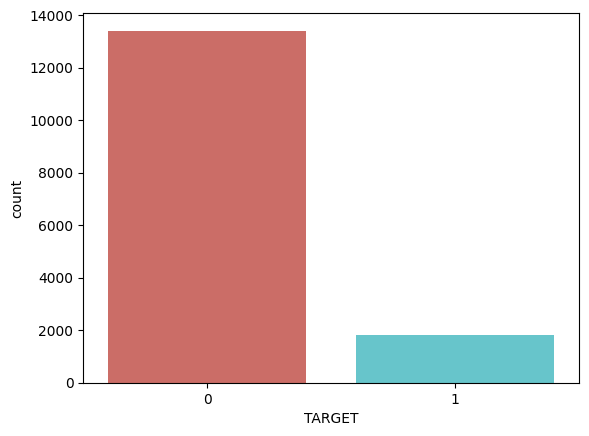

<Figure size 640x480 with 0 Axes>

In [7]:
sns.countplot(x='TARGET', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

Найдем процентное соотношение:

In [8]:
count_no_sub = len(data[data['TARGET']==0])
count_sub = len(data[data['TARGET']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("НЕТ ОТКЛИКА:", pct_of_no_sub*100, "%")
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("ПОЛОЖИТЕЛЬНЫЙ ОТКЛИК:", pct_of_sub*100, "%")

НЕТ ОТКЛИКА: 88.09695854956317 %
ПОЛОЖИТЕЛЬНЫЙ ОТКЛИК: 11.90304145043684 %


Классы наших данных не сбалансированы, а соотношение клиентов без вклада и с вкладом составляет 89 к 11. До балансировки классов проведём ещё несколько исследований:

In [9]:
data.groupby('TARGET').mean()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM
TARGET,,,,,,,,,,
0,40.849005,0.901350,0.145105,0.659906,1.095146,0.629632,13540.436161,1.397435,0.774588,0.182313
1,37.128035,0.970751,0.055740,0.614790,1.130795,0.760486,16173.378035,1.316225,0.583885,0.291943


**АНАЛИЗ:**

  * Средний возраст(AGE) клиентов кто откликнулся меньше возраста тех кто не откликнулся.
  * Количество погашенных ссуд (LOAN_NUM_CLOSED) клиента меньше у тех кто откликнулся.
  * % социального статуса клиента относительно работы с индексом 1 (SOCSTATUS_WORK_FL) выше у тех кто откликнулся.
   

Чтобы чётче представлять данные, рассчитаем категориальное среднее других категориальных переменных, таких как личный доход клиента (в рублях)(PERSONAL_INCOME)

In [10]:
data.groupby('PERSONAL_INCOME').mean()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
PERSONAL_INCOME,,,,,,,,,,
24.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1950.0,23.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2000.0,43.0,1.0,0.0,0.5,1.0,1.0,1.5,1.0,0.0,0.0
2100.0,54.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2300.0,49.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
150000.0,25.0,1.0,0.0,0.5,1.0,1.5,1.0,0.5,0.0,0.5
160000.0,52.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0
170000.0,56.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


Text(0, 0.5, 'Частота согласия с предлож. банка')

<Figure size 2000x1200 with 0 Axes>

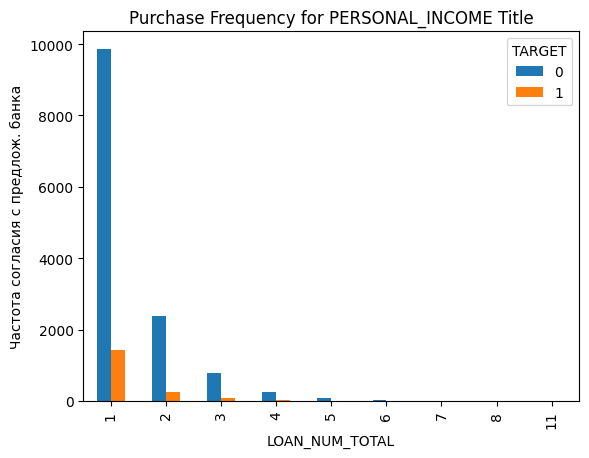

In [11]:
%matplotlib inline
plt.figure(figsize=(20,12))
# pd.crosstab(data.LOAN_NUM_CLOSED,data.TARGET).plot(kind='bar')
pd.crosstab(data.LOAN_NUM_TOTAL,data.TARGET).plot(kind='bar')


# DEPENDANTS
plt.title('Purchase Frequency for PERSONAL_INCOME Title')
# plt.xlabel('---')
plt.ylabel('Частота согласия с предлож. банка')
# plt.savefig('purchase_fre_job')


Частота согласия с условиями банка во многом зависит от количества ссуд клиента(LOAN_NUM_TOTAL), а значит, эта категориальная переменная может служить хорошим фактором прогнозирования.

Text(0, 0.5, 'Частота согласия с предлож. банка')

<Figure size 2000x1200 with 0 Axes>

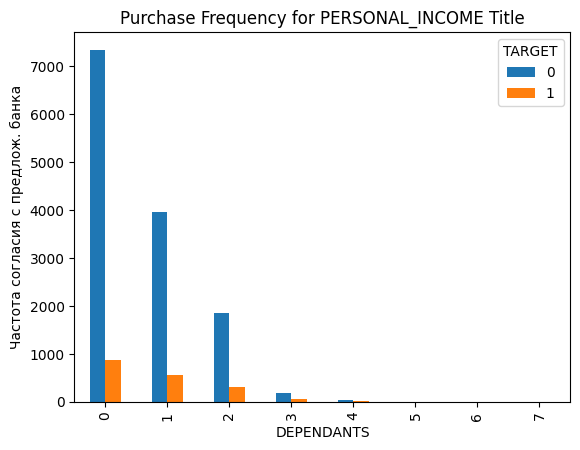

In [12]:
%matplotlib inline
plt.figure(figsize=(20,12))
# pd.crosstab(data.LOAN_NUM_CLOSED,data.TARGET).plot(kind='bar')
pd.crosstab(data.DEPENDANTS,data.TARGET).plot(kind='bar')


# DEPENDANTS
plt.title('Purchase Frequency for PERSONAL_INCOME Title')
# plt.xlabel('---')
plt.ylabel('Частота согласия с предлож. банка')
# plt.savefig('purchase_fre_job')

Также хорошим фактором прогнозирования выглядит количество иждивенцев клиента.

Text(0, 0.5, 'Частота согласия с предлож. банка')

<Figure size 2000x1200 with 0 Axes>

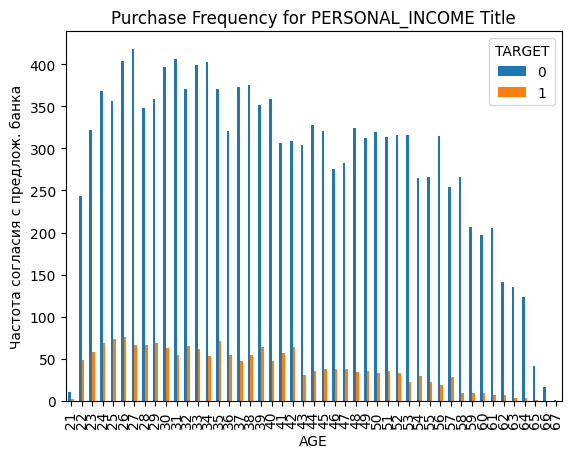

In [13]:
%matplotlib inline
plt.figure(figsize=(20,12))
# pd.crosstab(data.LOAN_NUM_CLOSED,data.TARGET).plot(kind='bar')
pd.crosstab(data.AGE,data.TARGET).plot(kind='bar')


# DEPENDANTS
plt.title('Purchase Frequency for PERSONAL_INCOME Title')
# plt.xlabel('---')
plt.ylabel('Частота согласия с предлож. банка')
# plt.savefig('purchase_fre_job')

Возраст сильным фактором прогнозирования не выглядит.

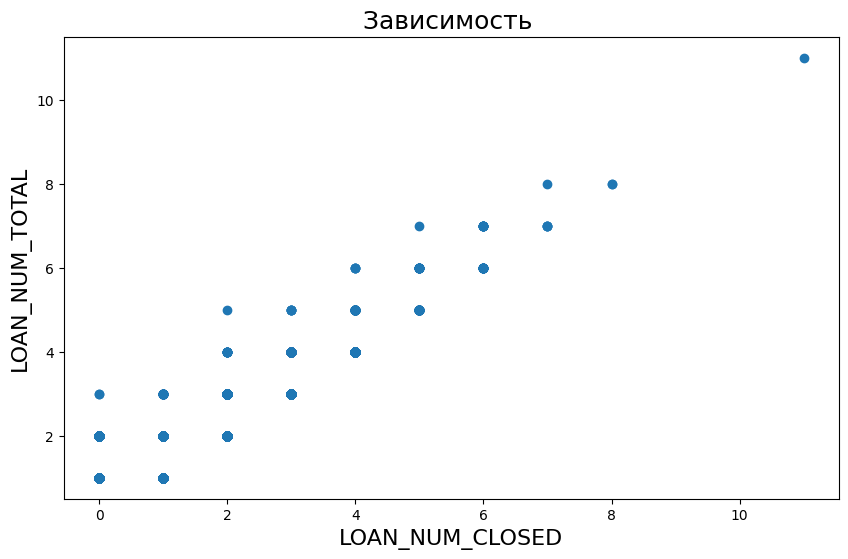

In [34]:
f = DataFrame(data, columns=['LOAN_NUM_TOTAL' ])
X = DataFrame(data, columns=['LOAN_NUM_CLOSED' ])
# Создаем точечную диаграмму для визуализации данных
plt.figure(figsize = (10,6))
plt.scatter(X, f)
# Добавляем подписи к осям и заголовок к графику
plt.xlabel('LOAN_NUM_CLOSED', fontsize = 16)
plt.ylabel('LOAN_NUM_TOTAL', fontsize = 16)
plt.title('Зависимость ',
fontsize = 18)
# Отображаем график
plt.show()

In [36]:
# Определение функции линейной регрессии
def regression(X, w, b):
  return w * X + b
# Определение функции потерь
def objective(X, f, w, b, n):
  return np.sum((y - regression(X, w, b)) ** 2) / (2 * n)
# Определение частной производной функции потерь по весу w
def partial_w(X, f, w, b, n):
  return np.sum(-X * (f - (w * X + b))) / n
# Определение частной производной функции потерь по смещению b
def partial_b(X, f, w, b, n):
  return np.sum(-(y - (w * X + b))) / n
# Функция для выполнения градиентного спуска
def gradient_descent(X, f, iter, learning_rate):
  w, b = 0, 0 # Начальные значения параметров модели
  n = len(X) # Количество точек данных
  # Списки для хранения истории значений параметров и функции потерь
  w_list, b_list, l_list = [], [], []

  # Основной цикл градиентного спуска
  for i in range(iter):
    w_list.append(w)
    b_list.append(b)
    l_list.append(objective(X, f, w, b, n))
    # Вычисление градиентов
    par_1 = partial_w(X, f, w, b, n)
    par_2 = partial_b(X, f, w, b, n)
    # Обновление параметров
    w = w - learning_rate * par_1
    b = b - learning_rate * par_2
  return w_list, b_list, l_list


# Выполнение градиентного спуска
w_list, b_list, l_list = gradient_descent(X, f, iter = 200,
learning_rate = 0.01)

# Выводим последние значения веса, смещения и функции потерь
print(w_list[-1], b_list[-1], l_list[-1])

# Получаем предсказания модели
y_pred_gd = regression(X, w_list[-1], b_list[-1])

# Создаем новый график для визуализации результатов регрессии
plt.figure(figsize = (10, 8))




/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

LOAN_NUM_CLOSED    0.0
LOAN_NUM_TOTAL     0.0
dtype: float64 LOAN_NUM_CLOSED    0.0
LOAN_NUM_TOTAL     0.0
dtype: float64 LOAN_NUM_CLOSED    0.0
LOAN_NUM_TOTAL     0.0
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

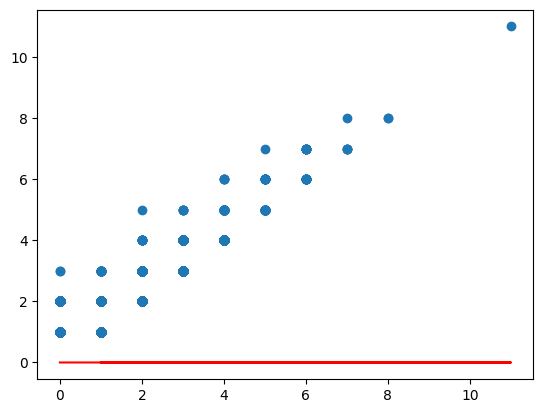

In [37]:
plt.scatter(X, f) # Точечная диаграмма исходных данных
plt.plot(X, y_pred_gd, 'r') # Линия предсказаний модели
plt.show()